In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
ds = pd.read_csv('Mall_Customers.csv')
ds.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [15]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
CustomerID                200 non-null int64
Genre                     200 non-null object
Age                       200 non-null int64
Annual Income (k$)        200 non-null int64
Spending Score (1-100)    200 non-null int64
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [16]:
X = ds.iloc[:,3:].values

In [22]:
#choosing the right clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    Kmeans = KMeans(n_clusters = i)
    Kmeans.fit(X)
    wcss.append(Kmeans.inertia_)

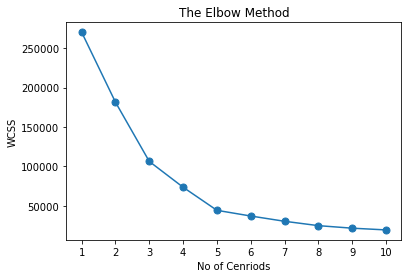

In [25]:
#visualization
plt.plot(range(1, 11), wcss, marker='o', markersize = 7,)
plt.xticks(range(1, 11))
plt.title('The Elbow Method')
plt.xlabel('No of Cenriods')
plt.ylabel('WCSS')

In [29]:
kmeans = KMeans(n_clusters = 4, random_state = 0)
y_kmeans = kmeans.fit_predict(X)
y_kmeans

array([3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0])

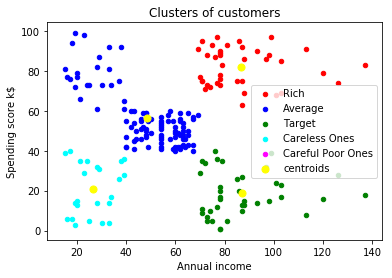

In [31]:
#visualizing the clusters
plt.scatter(X[y_kmeans ==0, 0], X[y_kmeans ==0, 1], s = 20, c = 'red', label = 'Rich')
plt.scatter(X[y_kmeans ==1, 0], X[y_kmeans ==1, 1], s = 20, c = 'blue', label = 'Average')
plt.scatter(X[y_kmeans ==2, 0], X[y_kmeans ==2, 1], s = 20, c = 'green', label = 'Target')
plt.scatter(X[y_kmeans ==3, 0], X[y_kmeans ==3, 1], s = 20, c = 'cyan', label = 'Careless Ones')
plt.scatter(X[y_kmeans ==4, 0], X[y_kmeans ==4, 1], s = 20, c = 'magenta', label = 'Careful Poor Ones')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s= 50, c = 'yellow', label='centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual income')
plt.ylabel('Spending score k$')
plt.legend()